# Getting knot core data from [KnotProt](https://knotprot.cent.uw.edu.pl/api)

In [1]:
import requests

API_URL = 'https://knotprot.cent.uw.edu.pl/'

In [2]:
def perform_request(url_specification):
    response = requests.get(API_URL + url_specification)
    print(f'Response returned code {response.status_code}.')
    if response.ok:
        response_content = response.content.decode('utf-8') 
        return response_content if response_content != 'N/A' else ''
    else:
        return ''
    
def get_sequences_with_knot_ranges():
    # knot range is tha last element on line, in format <START>-<END>
    return perform_request('_all_chains_knotted_N_C_sequence')

def get_sequences_with_knots_in_ranges(start, end):
    # knot range is tha last element on line, in format <START>-<END>
    return perform_request('_all_chains_knotted_N_C_sequence')

In [3]:
response = get_sequences_with_knot_ranges()

Response returned code 200.


In [4]:
from io import StringIO
import csv

f = StringIO(response)
reader = csv.reader(f, delimiter=';')
data = list(reader)

# header:
data[0]

['# PDB code',
 'Chain',
 'PFAM Acc',
 'Chain Length',
 '{Y,A,T}={Published,Artifact,Not published}',
 '{K,S}={Knot,Slipknot}',
 'Main knot type (e.g. 31=3.1)',
 'N_cut',
 'C_cut',
 'Knots range',
 'Sequence']

Clean the data:

In [5]:
import pandas as pd

df = pd.DataFrame(data[1:], columns=data[0])
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,Sequence
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...


In [6]:
# remove sequences that don't have knot range information (there are only 2):
df = df.drop(df[df['Knots range'] == 'None'].index)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,Sequence
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...


In [7]:
df = df.rename(columns={'Sequence': 'sequence'})

Create separate interval columns:

In [8]:
df['knot_start'] = df.apply(lambda row: row['Knots range'].split('-')[0], axis = 1)
df['knot_end'] = df.apply(lambda row: row['Knots range'].split('-')[1], axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...,437,680


In [9]:
# pd.set_option('display.max_rows', 500)
df['knot_end'].value_counts()

255    329
254    240
256    154
253    121
264     44
      ... 
387      1
389      1
427      1
407      1
680      1
Name: knot_end, Length: 373, dtype: int64

Look for knot core lengths distribution:

In [10]:
df['knot_length'] = df.apply(lambda row: (int(row['knot_end']) - int(row['knot_start'])), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...,437,680,243


In [16]:
import matplotlib.pyplot as plt

def plot_column_value_count_distribution(df, column_name, change_y_scale=False):
    df_lengths = df[column_name].value_counts().to_frame()
    df_lengths['index'] = df_lengths.index
    df_lengths = df_lengths.sort_values('index')
    df_lengths = df_lengths.reset_index(drop=True)
    
    middle_index = len(df_lengths) // 2
    
    plt.rcParams['figure.figsize'] = (30,3)
    ax = df_lengths.head(middle_index).plot(x='index', y=column_name, kind='bar', rot=90)  # rot to rotate x-axis data point description
    if change_y_scale:
        plt.ylim([0, 205])  # force y-axis scale to be the same as it is for the second graph
    plt.show()

    ax = df_lengths.tail(len(df_lengths) - middle_index).plot(x='index', y=column_name, kind='bar', rot=90)
    plt.show()

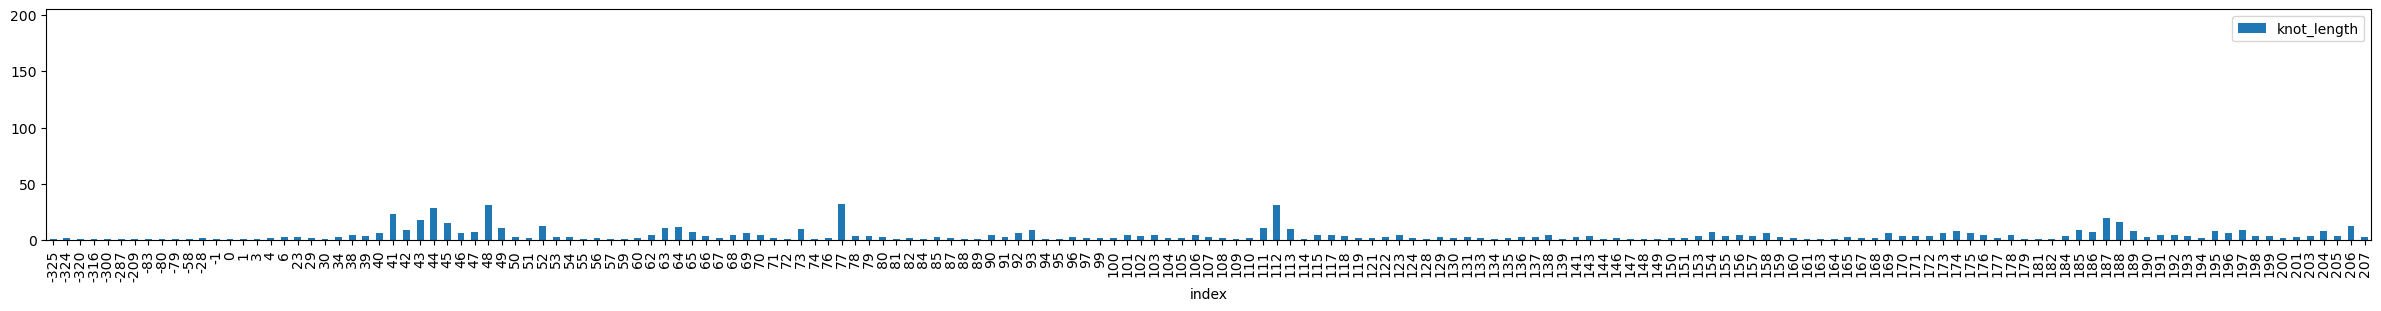

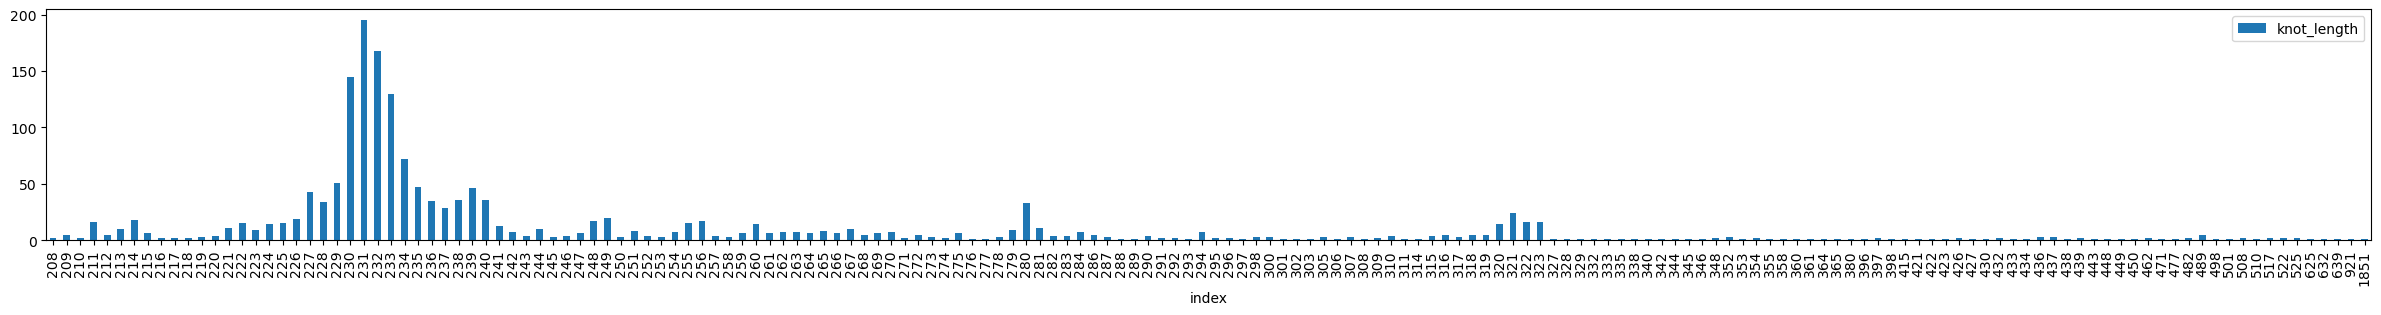

In [17]:
plot_column_value_count_distribution(df, 'knot_length', True)

In [18]:
df.loc[df['knot_length'] < 0]

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length
1005,4zg6,A,None,804,Y,S,31,510,162,511-302,GSCKGRCFELCRCDNLCKSYTSCCHDFDELCLKTARGWECTKDRCG...,511,302,-209
2100,6i7s,A,PF00085,461,Y,S,31,4,268,220-192,APEEEDHVLVLRKSNFAEALAAHKYLLVEFYAPWCGHCKALAPEYA...,220,192,-28
2101,6i7s,A,PF13848,461,Y,S,31,4,268,220-192,APEEEDHVLVLRKSNFAEALAAHKYLLVEFYAPWCGHCKALAPEYA...,220,192,-28
2154,6fij,A,None,1284,Y,S,31,878,92,879-878,AQMRVVAFGDQTYDCSEAVSQLLRVRDDAIVVDFLERAPAVLKAEL...,879,878,-1
2402,5adx,Y,None,243,A,K,31,208,112,209-130,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,209,130,-79
2420,6f38,Y,None,264,A,K,31,228,115,229-149,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,229,149,-80
2434,5ayl,A,None,751,A,S,31,97,21,481-194,DQNFYSLLGVSKTASSREIRQAFKKLALKLHPDKNPNNAHGDFLKI...,481,194,-287
2502,6f1t,N,None,616,A,S,31,601,531,602-286,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,602,286,-316
2507,5zep,0,None,459,A,K,31,229,286,230-172,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,230,172,-58
2518,6f3a,N,None,616,A,S,31,607,533,608-284,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,608,284,-324


In [20]:
# drop all sequences with negative knot core lengths:
df.drop(df.loc[df['knot_length'] < 0].index, inplace=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...,437,680,243


https://knotprot.cent.uw.edu.pl/view/4zg6/A/

Slipknot ranges are not returned by the API. 

### TODO: have a look at how many sequences have only knot cores and how many also have slipknots

Sequence length distribution:

In [21]:
df['seq_length'] = df.apply(lambda row: (len(row['sequence'])), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length,seq_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43,243
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,435
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,446
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38,241
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34,436
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34,436
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...,437,680,243,735


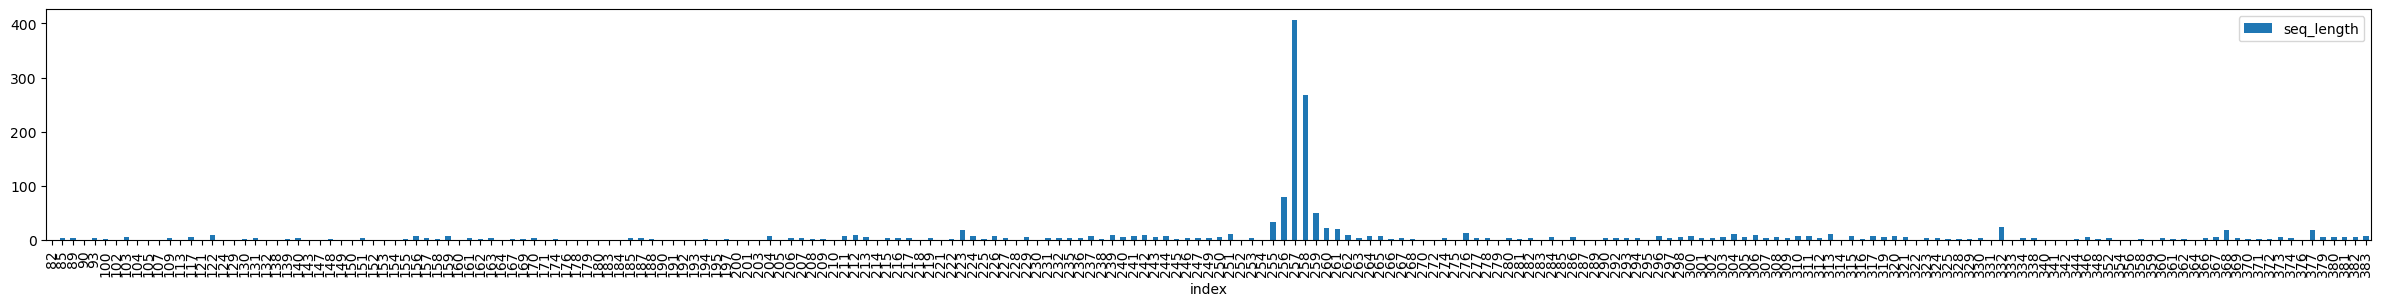

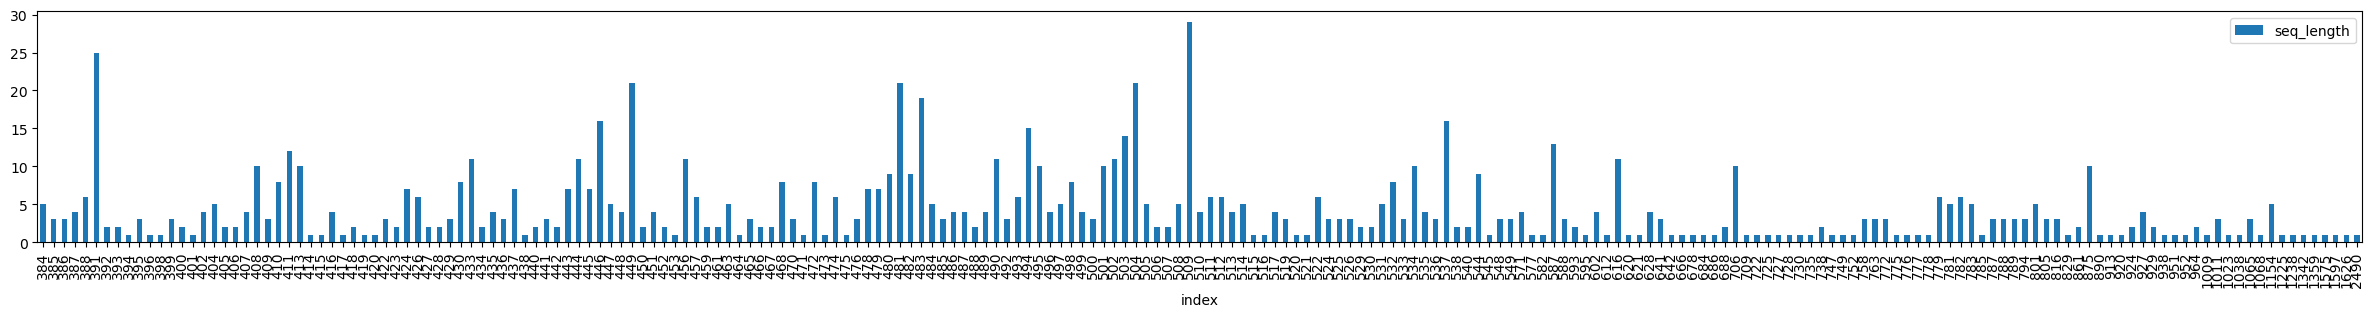

In [22]:
plot_column_value_count_distribution(df, 'seq_length')

In [23]:
# drop all sequences with sequence_length > 500:
df.drop(df.loc[df['seq_length'] > 500].index, inplace=True)

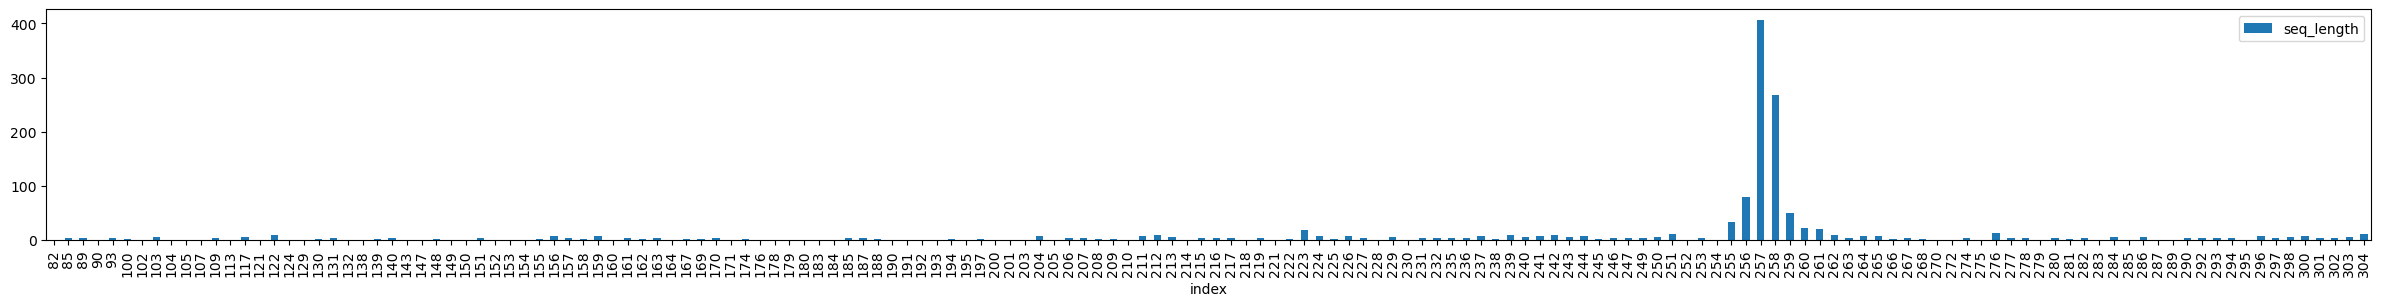

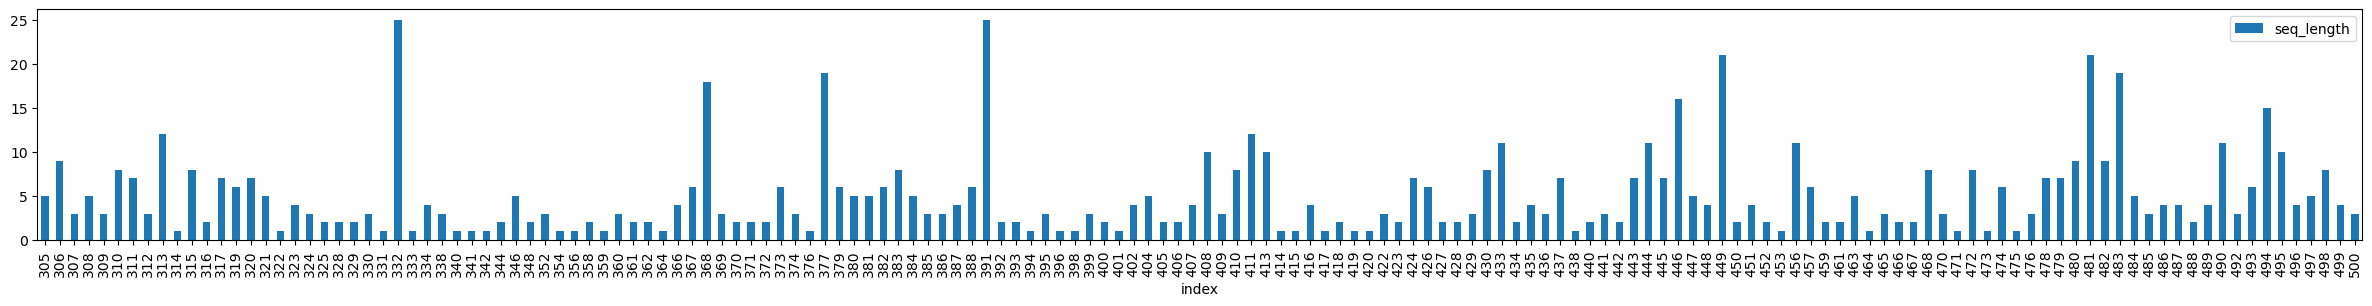

In [24]:
plot_column_value_count_distribution(df, 'seq_length')

In [25]:
df['x_count'] = df.apply(lambda row: row['sequence'].count('X'), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length,seq_length,x_count
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43,243,0
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,435,0
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449,0
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,446,0
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,15,163,148,246,0
2573,1ybw,A,PF00089,253,T,K,52,10,34,11-210,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,11,210,199,246,0
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38,241,0
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34,436,0


In [26]:
df.loc[df['x_count'] > 0]

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length,seq_length,x_count
10,1auk,A,PF00884,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,481,1
11,1auk,A,PF14707,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,481,1
12,1b8j,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449,1
27,1e33,P,PF00884,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,481,1
28,1e33,P,PF14707,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,481,1
93,1n2k,A,PF00884,486,Y,S,31,6,193,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,482,1
94,1n2k,A,PF14707,486,Y,S,31,6,193,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,7,263,256,482,1
95,1n2l,A,PF00884,486,Y,S,31,7,192,8-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,8,263,255,483,1
96,1n2l,A,PF14707,486,Y,S,31,7,192,8-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,8,263,255,483,1
323,3ed7,A,PF00303,289,Y,K,31,5,74,6-215,LXXXXPPHGELQYLGQIQHILRCGVRKDDRTGTGTLSVFGMQARYS...,6,215,209,284,4


In [27]:
# drop all sequences with x_count > 0:
df.drop(df.loc[df['x_count'] > 0].index, inplace=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,knot_start,knot_end,knot_length,seq_length,x_count
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43,243,0
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,435,0
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449,0
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,446,0
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323,449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,15,163,148,246,0
2573,1ybw,A,PF00089,253,T,K,52,10,34,11-210,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,11,210,199,246,0
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38,241,0
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34,436,0


Save data to CSV files:

In [28]:
df_reduced = df[['sequence', 'knot_start', 'knot_end', 'knot_length']].copy()
df_reduced

,sequence,knot_start,knot_end,knot_length
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
4,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
...,...,...,...,...
2572,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,15,163,148
2573,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,11,210,199
2574,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38
2575,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,115,149,34


In [29]:
df_reduced.to_csv('/home/jovyan/data/proteins/knot_prot_reduced.csv')